In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#import plotly.graph_objs as go
#import plotly.tools as tls
import os
import gc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier








import time
import random
import warnings
warnings.filterwarnings("ignore")
from math import *
import operator
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 10000)
import string
from pprint import pprint

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import graphviz
from IPython.display import display


# pre-processing
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


# import libraries for model validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr
import statistics


In [2]:
dataset = pd.read_csv('E:/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Splitting data into Input and Target Variable

y = dataset[['Outcome']]  # target variable i.e diabetic or not
X = dataset.drop(['Outcome'], axis=1)  # input variables

# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=1)


# K-Nearest Neighbors to Predict Diabetes


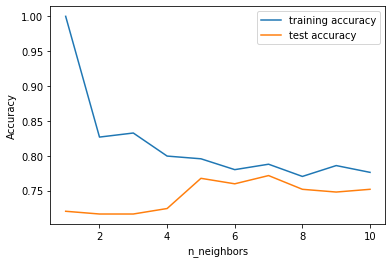

In [10]:

from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [11]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.75


# Decision Tree Classifier


In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.728


In [13]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.763
Accuracy on test set: 0.787


# Feature Importance in Decision Trees


In [14]:
print("Feature importances:\n{}".format(tree.feature_importances_))


Feature importances:
[0.04067527 0.62563446 0.         0.         0.         0.20980975
 0.         0.12388053]


NameError: name 'diabetes_features' is not defined

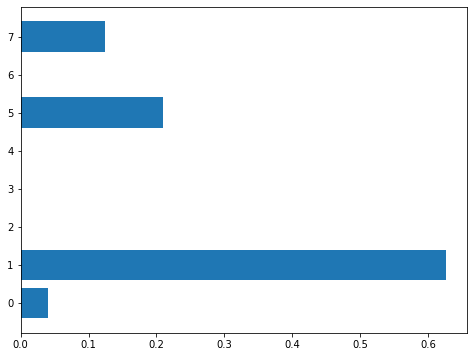

In [15]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)

Feature: 0, Score: 29.35821
Feature: 1, Score: 0.00000
Feature: 2, Score: 41.81266
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: 41.28219
Feature: 6, Score: 61.21839
Feature: 7, Score: 45.15258


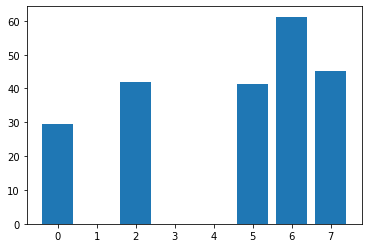

In [14]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=8, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

C:\Users\sepideh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Feature: 0, Score: 0.16237
Feature: 1, Score: -0.64314
Feature: 2, Score: 0.48377
Feature: 3, Score: -0.46158
Feature: 4, Score: 0.18440
Feature: 5, Score: -0.11963
Feature: 6, Score: -0.40467
Feature: 7, Score: 0.03680
Feature: 8, Score: -0.51735
Feature: 9, Score: 0.26411


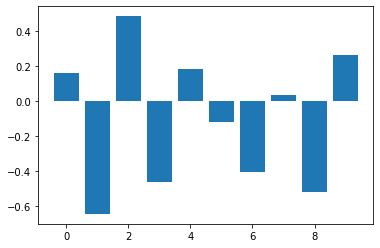

In [18]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00283
Feature: 1, Score: 0.00553
Feature: 2, Score: 0.00238
Feature: 3, Score: 0.00278
Feature: 4, Score: 0.54365
Feature: 5, Score: 0.40811
Feature: 6, Score: 0.02594
Feature: 7, Score: 0.00254
Feature: 8, Score: 0.00345
Feature: 9, Score: 0.00280


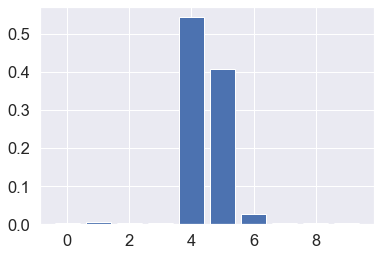

In [59]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))


# random forest feature importance

C:\Users\sepideh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature: 0, Score: 0.08183
Feature: 1, Score: 0.01079
Feature: 2, Score: 0.19225
Feature: 3, Score: 0.00784
Feature: 4, Score: 0.01241
Feature: 5, Score: 0.13125
Feature: 6, Score: 0.35799
Feature: 7, Score: 0.20563


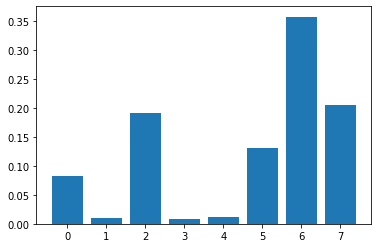

In [4]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=8, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# XGBoost Regression Feature Importance


Feature: 0, Score: 0.05258
Feature: 1, Score: 0.00352
Feature: 2, Score: 0.18870
Feature: 3, Score: 0.00343
Feature: 4, Score: 0.00189
Feature: 5, Score: 0.14617
Feature: 6, Score: 0.39051
Feature: 7, Score: 0.21321


<BarContainer object of 8 artists>

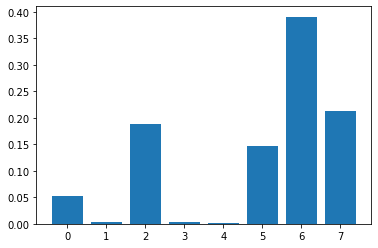

In [12]:
# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=8, n_informative=5, random_state=1)
# define the model
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)


In [21]:
df_HD=dataset.rename({'Pregnancies':'Preg', 'BloodPressure':'BP', 'SkinThickness':'Skin_Thick','DiabetesPedigreeFunction':'DPF'},axis=1)

In [22]:
# Removing the rows with 0 values of "BP","BMI" and "Glucose" :
df_HDR=df_HD[(df_HD.BP!=0) & (df_HD.BMI!=0) & (df_HD.Glucose!=0)]
print(df_HDR.shape)

(724, 9)


In [23]:
#Feature Engineering: to improve the performance and accuracy of the model.
#Lets assign the features to the X variable and the response to the y variable 
feature_names = ['Preg', 'Glucose', 'BP', 'Skin_Thick', 'Insulin', 'BMI', 'DPF', 'Age']
X = df_HDR[feature_names]
y = df_HDR.Outcome

In [27]:
# Model Selection:
# Lets initialize the seven different classifier models with their default parameters and add them to a model 
#list as:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))

In [28]:
# Train/Test Split with Scikit Learn:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df_HDR.Outcome, random_state=0)

In [29]:
# Fitting of each model and calculation the accuracy of the respective model using the "accuracy_Score". 
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.729282
1  SVC  0.657459
2   LR  0.767956
3   DT  0.751381
4  GNB  0.734807
5   RF  0.729282
6   GB  0.773481
7  XGB  0.773481


In [30]:
# K-Fold Cross Validation
# This method splits the data set into K equal partitions ("folds"), then 1 fold as the testing set and the union 
# of the other folds as the training set. Then the model is tested for accuracy. The process will follow the above steps
# K times, using different fold as the testing set each time. The average testing accuracyof the process is the testing 
# accuracy. 
# This method is more accurate estimate of out-of-sample accuracy. More "efficient" use of data (every observation 
# is used for both training and testing). The downside of this method is much slower than Train/Test split.We need more 
# computation capability for this method.

names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.719787
1  SVC  0.656279
2   LR  0.766781
3   DT  0.696233
4  GNB  0.757021
5   RF  0.754395
6   GB  0.775038
7  XGB  0.736263


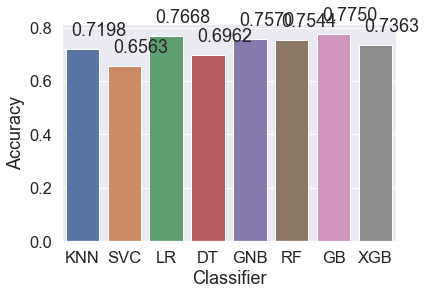

In [31]:
# Plotting the accuracy scores using Seaborn:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width(), height + 0.05, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [32]:
# At the base line Logistic Regression can be selected to achieve a classification accuracy of76.67%. 
# However, Gradient Boosting classifier is managed to achieve a classification accuracy of 77.36%, which is greater than 
# the accuracy of the KNN model, 71.98%. 
# Therefore, Gradient Boosting is selected as the prime candidate for the next phase.

In [33]:
# Gradient Boosting:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbc.score(X_test, y_test)))

Accuracy on training set: 0.915
Accuracy on test set: 0.773


In [34]:
# We are likely to be overfitting. To reduce overfitting, e could either apply stronger pre-pruning by 
# limiting the maximum depth or lower the learning rate as follows:
gbc1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gbc1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbc1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbc1.score(X_test, y_test)))

Accuracy on training set: 0.810
Accuracy on test set: 0.762


In [35]:
gbc2 = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.01)
gbc2.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbc2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbc2.score(X_test, y_test)))

Accuracy on training set: 0.762
Accuracy on test set: 0.762


In [36]:
predictions_gbc2 = gbc2.predict(X_test)


# Evaluation of gradient boosting model:¶


In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions_gbc2))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       119
           1       0.81      0.40      0.54        62

    accuracy                           0.76       181
   macro avg       0.78      0.68      0.69       181
weighted avg       0.77      0.76      0.74       181



In [38]:
print(confusion_matrix(y_test,predictions_gbc2))


[[113   6]
 [ 37  25]]


In [39]:
# We are able to reduce the accuracy of traing set i.e. overfitting problem is solved as expected. However, the 
# accuracy of the test set couldn't enhance the generalization performance. We further visualize the feature importances
# to get more insight into our model. 
gbc2.feature_importances_
importances=list(gbc2.feature_importances_)

In [40]:
importances

[0.0,
 0.8251161965950043,
 0.0,
 0.0,
 0.0,
 0.11747484885673151,
 0.0,
 0.05740895454826428]

In [41]:
feature_importances = [(features, round(importance, 2)) for features, importance in zip(X, importances)]
feature_importances

[('Preg', 0.0),
 ('Glucose', 0.83),
 ('BP', 0.0),
 ('Skin_Thick', 0.0),
 ('Insulin', 0.0),
 ('BMI', 0.12),
 ('DPF', 0.0),
 ('Age', 0.06)]

In [42]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('Glucose', 0.83),
 ('BMI', 0.12),
 ('Age', 0.06),
 ('Preg', 0.0),
 ('BP', 0.0),
 ('Skin_Thick', 0.0),
 ('Insulin', 0.0),
 ('DPF', 0.0)]

In [43]:
# plot the graph - feature importance wise
df_feature_importance = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
df_feature_importance

,feature,importance
0,Glucose,0.83
1,BMI,0.12
2,Age,0.06
3,Preg,0.00
4,BP,0.00
5,Skin_Thick,0.00
6,Insulin,0.00
7,DPF,0.00


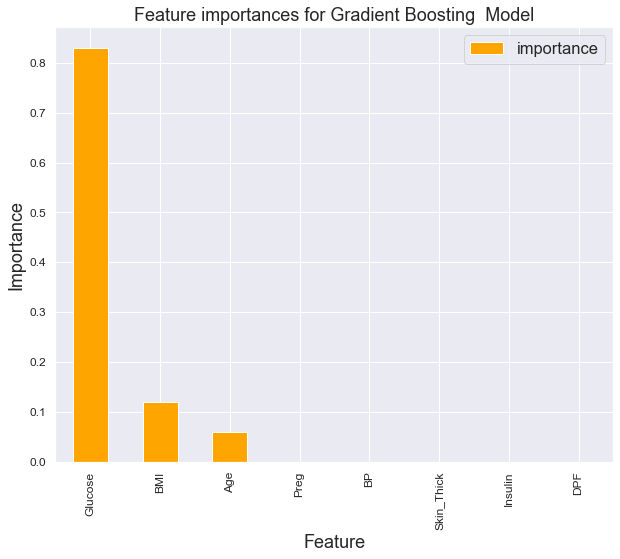

In [44]:
ax = df_feature_importance.plot(kind='bar', 
        x='feature', 
        y='importance',
        figsize=(10,8),
        title= 'Feature importances for Gradient Boosting  Model',
        grid=True,
        legend=True,
        fontsize = 12,                        
        color='orange',    
       );
# Set the x-axis label
ax.set_xlabel("Feature")

# Set the y-axis label
ax.set_ylabel("Importance");

In [46]:
# Train/Test Split with Scikit Learn:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, stratify = df_HDR.Outcome, random_state=0)

In [47]:
import statsmodels.formula.api as smf
model_f = 'Outcome ~ Glucose'

model = smf.ols(formula=model_f, data=df_HDR)
lmod = model.fit()

In [48]:
# fitted values (need a constant term for intercept)
model_fitted_y = lmod.fittedvalues

# model residuals
model_residuals = lmod.resid

# normalized residuals
model_norm_residuals = lmod.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = lmod.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = lmod.get_influence().cooks_distance[0]

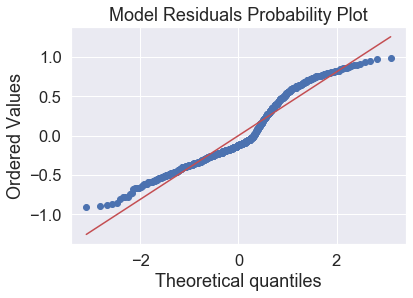

In [49]:

from scipy import stats
stats.probplot(lmod.resid, plot= plt)
plt.title("Model Residuals Probability Plot");

In [50]:
print("Accuracy on training set: {:.3f}".format(gbc2.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(gbc2.score(X_test1, y_test1)))

Accuracy on training set: 0.762
Accuracy on test set: 0.762


In [51]:
predictions_gb = gbc2.predict(X_test1)


In [52]:
predictions_gb


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0], dtype=int64)

# Evaluating Gradient Boosting Model:¶


In [53]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,predictions_gb))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       119
           1       0.81      0.40      0.54        62

    accuracy                           0.76       181
   macro avg       0.78      0.68      0.69       181
weighted avg       0.77      0.76      0.74       181



In [54]:
print(confusion_matrix(y_test1,predictions_gb))


[[113   6]
 [ 37  25]]


In [55]:
# For better visualisation:
con_matx = pd.crosstab(y_test1, predictions_gb, rownames=['Actual'], colnames=['Predicted'], margins=True)
con_matx

Predicted,0,1,All
Actual,,,
0,113,6,119
1,37,25,62
All,150,31,181


# Interpretations:
High precision value, recall >0.5, and high F1 score indicate the good performance of the model.
TN=113 means actually no Diabetes in 113 people, predicted also the same.
TP=25 means actual number of people with Diabetes is 25, prediction also the same.
FP=6 means 6 people doesn't have Diabetes in reality , but the prediction shows them to have diabetes.
FN=37 means actual class shows that 37 people does have Diabetes, but the prediction shows them no diabetes.
ROC Curve Metrics

# ROC Curve Metrics
A Receiver Operating Characteristic (ROC) curve calculates the false positive rates and true positive rates across different thresholds.

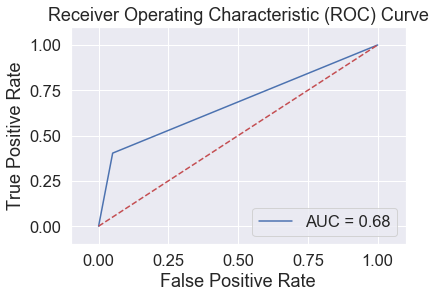

In [56]:
fpr, tpr, _ = metrics.roc_curve(y_test1, predictions_gb)
auc_score = metrics.auc(fpr, tpr)
#[fpr=false-positive-rate]
# [tpr=true-positive-rate]
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

# The above curve indicates that the model dishtinguishes the positive and negative values by 68%.


# Deep Learning to Predict Diabetes
